In [1]:
# Your code here - remember to use markdown cells for comments as well!
# Student name: Sage Reagan
# Instructor name: Charlie Rice, Lera Tsayukova

In [2]:
# importing packages:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
conn = sqlite3.Connection("zippedData/im.db")

read in data from csv and tsv

In [3]:
# read in all the csv/tsv dataframes
# read in box office movie info
bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

In [4]:
# read in rotten tomatoes movie info
movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t')

In [5]:
# read in tmdb movies
tmdb = pd.read_csv("zippedData/tmdb.movies.csv.gz")

In [6]:
tmdb = pd.read_csv("zippedData/tmdb.movies.csv.gz", sep='\t')

In [7]:
# read in movie budgets
budget = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

# Movie budget data cleaning and analyzing

In [8]:
# clean movie budget data 
# clean budget data so that the numbers are integers rather than strings
budget["production_budget"] = budget["production_budget"].str.replace("$", "")
budget["domestic_gross"] = budget["domestic_gross"].str.replace("$", "")
budget["worldwide_gross"] = budget["worldwide_gross"].str.replace("$", "")

budget["production_budget"] = budget["production_budget"].str.replace(",", "")
budget["domestic_gross"] = budget["domestic_gross"].str.replace(",", "")
budget["worldwide_gross"] = budget["worldwide_gross"].str.replace(",", "")

budget["production_budget"] = budget["production_budget"].astype(int)
budget["domestic_gross"] = budget["domestic_gross"].astype(int)
budget["worldwide_gross"] = budget["worldwide_gross"].astype(float)

C:\Users\mabbasian\AppData\Local\Temp\ipykernel_11156\3197838212.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budget["production_budget"] = budget["production_budget"].str.replace("$", "")
C:\Users\mabbasian\AppData\Local\Temp\ipykernel_11156\3197838212.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budget["domestic_gross"] = budget["domestic_gross"].str.replace("$", "")
C:\Users\mabbasian\AppData\Local\Temp\ipykernel_11156\3197838212.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budget["worldwide_gross

In [9]:
# add two columns for domestic profit and profit
budget["domestic_profit"] = budget["domestic_gross"] - budget["production_budget"]
budget["profit"] = budget["worldwide_gross"] - budget["production_budget"]
# sort budget in descending order of worldwide_gross
budget = budget.sort_values(by = "worldwide_gross", ascending = False)

In [10]:
top_budget = budget.head()
top_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,335507625,2.351345e+09
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09,459363944,2.008208e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09,630662225,1.747311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,378815482,1.748134e+09
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09,437270625,1.433855e+09


# Split all the Genres so there is only 1 Genre per row

In [11]:
genres = """
SELECT genres,
       primary_title
FROM movie_basics
"""
genres_df = pd.read_sql(genres, conn)
genres_df

# clean genres column so each row has only one genre 

genres_dict = dict(zip(genres_df.iloc[:, 1], genres_df.iloc[:, 0]))
genres_dict

cleaned_genres_dict = {}

for title, genre in genres_dict.items():
    split_genres = 

SyntaxError: invalid syntax (216624458.py, line 17)

# Writers and the average worldwide gross of all the movies they have been part of

using sql query create a table that displays the name of the movie and who the movie is known for

In [12]:
# SQL query that returns the name of the movie and who that movie is known for:
knownfor = """
SELECT 
    persons.primary_name,
    principals.job,
    persons.primary_profession,
    movie_basics.primary_title
FROM persons
JOIN known_for
    USING(person_id)
JOIN movie_ratings
    USING(movie_id)
JOIN movie_basics
    USING(movie_id)
JOIN principals
    USING(movie_id)
WHERE job LIKE "written by" OR job LIKE "script writer" OR job LIKE "co-writer" OR job LIKE "co writer"
"""

knownfor_df = pd.read_sql(knownfor, conn)

# get rid of duplicates and empty values in the SQL table 
knownfor_df = knownfor_df.drop_duplicates()
knownfor_df = knownfor_df.dropna()
knownfor_df

,primary_name,job,primary_profession,primary_title
0,Su Armstrong,written by,"producer,miscellaneous,production_manager",Leap Year
1,Liam Bates,written by,"composer,music_department,soundtrack",Leap Year
2,Harry Elfont,written by,"writer,producer,miscellaneous",Leap Year
3,Deborah Kaplan,written by,"writer,producer,director",Leap Year
4,Brian Milligan,written by,actor,Leap Year
...,...,...,...,...
68135,Brian Hull,written by,actor,Puppy Star Christmas
68136,Kaarle Aho,co-writer,producer,The Magic Life of V
68137,Tonislav Hristov,co-writer,"writer,director,editor",The Magic Life of V
68138,Kirstine Barfod,co-writer,"producer,costume_designer,miscellaneous",The Magic Life of V


In [13]:
knownfor_df["job"].unique()

array(['written by', 'co-writer', 'script writer', 'co writer',
       'Written by', 'Co-Writer', 'Co-writer', 'Written By'], dtype=object)

In [14]:
# examine the budget table 
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,335507625,2.351345e+09
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09,459363944,2.008208e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09,630662225,1.747311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,378815482,1.748134e+09
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09,437270625,1.433855e+09


merge the budget and known_for table then create a table showing only the name of the known person and the worldwide gross of the movie

In [15]:
# merge the budget table and the table with who a movie is known for 
profit_and_knownfor = pd.merge(budget, knownfor_df, left_on='movie', right_on="primary_title")
profit_and_knownfor.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,profit,primary_name,job,primary_profession,primary_title
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,335507625,2.351345e+09,Nako Mizusawa,written by,actress,Avatar
1,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,335507625,2.351345e+09,Hideki Ikari,written by,composer,Avatar
2,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,335507625,2.351345e+09,Tôru Hirao,written by,"cinematographer,executive",Avatar
3,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,335507625,2.351345e+09,Atsushi Wada,written by,director,Avatar
4,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,335507625,2.351345e+09,Yuri Hane,written by,actress,Avatar


In [16]:
# create a table with just known for's primary name and the world wide gross of the movie they where in
wwg_knownfor = profit_and_knownfor.loc[:,["primary_name", "worldwide_gross"]]
wwg_knownfor

,primary_name,worldwide_gross
0,Nako Mizusawa,2.776345e+09
1,Hideki Ikari,2.776345e+09
2,Tôru Hirao,2.776345e+09
3,Atsushi Wada,2.776345e+09
4,Yuri Hane,2.776345e+09
...,...,...
14571,Ben Acker,0.000000e+00
14572,Adam Busch,0.000000e+00
14573,Jordan Katz,0.000000e+00
14574,Lynette Zumo,0.000000e+00


In [17]:
# clean the table above to get rid of any values of 0
empty_index = wwg_knownfor[wwg_knownfor["worldwide_gross"] == 0].index
wwg_knownfor = wwg_knownfor.drop(empty_index)
wwg_knownfor.head(10)
#wwg_d = wwg_d.sort_values(by = "worldwide_gross", ascending=False)

,primary_name,worldwide_gross
0,Nako Mizusawa,2.776345e+09
1,Hideki Ikari,2.776345e+09
2,Tôru Hirao,2.776345e+09
3,Atsushi Wada,2.776345e+09
4,Yuri Hane,2.776345e+09
5,Teruo Noguchi,2.776345e+09
6,Vin Diesel,1.518723e+09
7,Jason Statham,1.518723e+09
8,Lucas Black,1.518723e+09
9,Jordana Brewster,1.518723e+09


create a graph showing the relationship between a movies gross return and who the movie is known for

Text(0.5, 1.0, 'actor and the average worldwide gross of the movies they have been in')

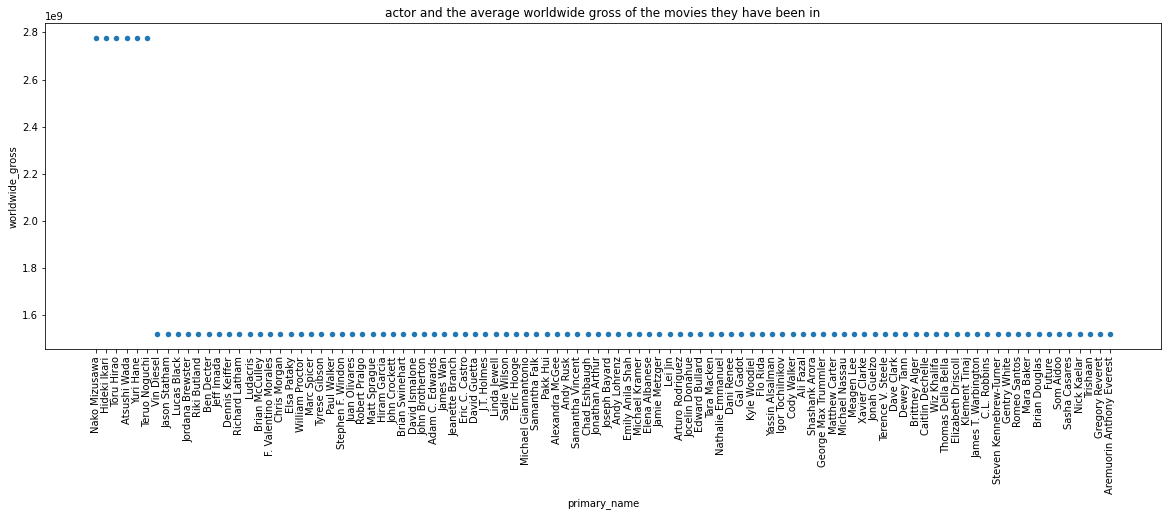

In [18]:
# create a scatter plot showing that there is a correlation between who a movie is known for and worldwide gross
top_wwg_knownfor = wwg_knownfor.head(100)
plt.rcParams["figure.figsize"] = (20,6)
top_wwg_knownfor.plot(x = "primary_name", y = "worldwide_gross", kind = "scatter")
plt.xticks(rotation='vertical')
plt.title("actor and the average worldwide gross of the movies they have been in")

<AxesSubplot:xlabel='primary_name'>

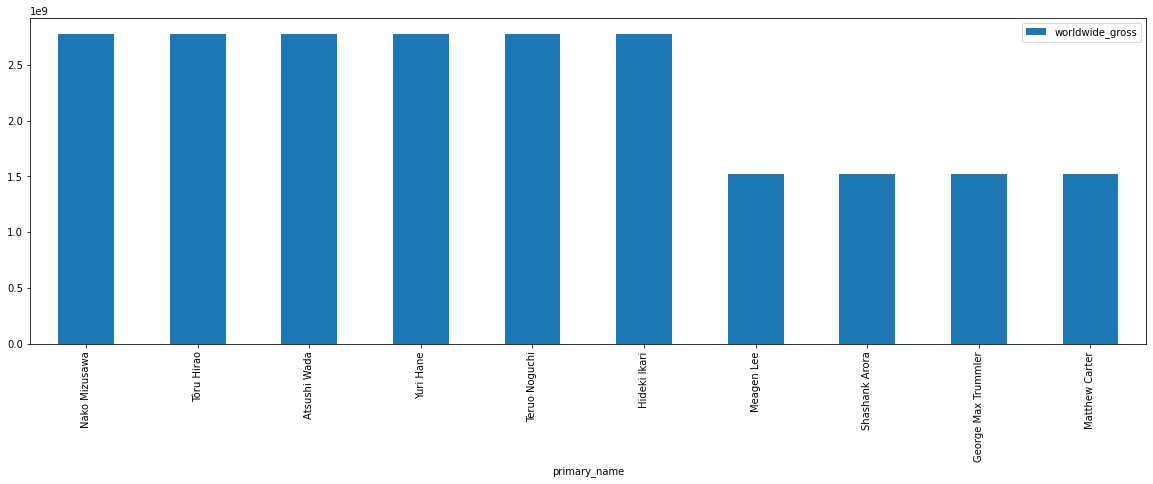

In [19]:
# create a bar graph showing the actors in the top 10 highest grossing movies
top_wwg_knownfor = wwg_knownfor.sort_values("worldwide_gross", ascending=False).head(10)
top_wwg_knownfor
plt.rcParams["figure.figsize"] = (20,6)
top_wwg_knownfor.plot(x = "primary_name", y = "worldwide_gross", kind = "bar")

# Writers and the average ratings of all the movies they have been a part of

In [20]:
num_of_movies = """
SELECT 
    COUNT(movie_basics.primary_title),
    persons.primary_name
FROM persons
JOIN writers
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
GROUP BY primary_name
    HAVING COUNT(movie_basics.primary_title)
"""
num_of_movies_df = pd.read_sql(num_of_movies, conn)
num_of_movies_df

,COUNT(movie_basics.primary_title),primary_name
0,1,'A.J.' Marriot
1,1,'Om' Rakesh Chaturvedi
2,1,42nd Street Pete
3,2,50 Cent
4,83,A Normale Jef
...,...,...
120598,1,Þorsteinn Guðmundsson
120599,2,Þóra Leósdóttir
120600,1,Þórdís Elva Þorvaldsdóttir
120601,1,Þórhallur Þórhallsson


find the average number of movies that a writer has been in

In [21]:
avg_movies = num_of_movies_df["COUNT(movie_basics.primary_title)"].mean()
avg_movies


2.12159730686633

create a sql query that returns a table with the name of the people known for a moive, the movie they where in, and the rating of that movie

In [22]:
# the table should displaythe name of the writer, job of the writer on this movie, and the average ratings
# of all the movies the writer has been in
# include a where statement that ensures this person has a proffesion as a writter
# group by the writers name to get the average rating of their movies and then use a having statement to ensure this
# writer has been in more than two movies and their career is not a one off
writers_and_ratings = """
SELECT 
    persons.primary_name,
    movie_ratings.averagerating
FROM persons
JOIN known_for 
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id)
JOIN principals
    USING(movie_id)
WHERE job LIKE "written by" OR job LIKE "script writer" OR job LIKE "co-writer" OR job LIKE "co writer"
GROUP BY primary_name
    HAVING COUNT(primary_title) >= 2    

"""
writers_ratings_df = pd.read_sql(writers_and_ratings, conn)
writers_ratings_df

# clean the data from the new table 
writers_ratings_df = writers_ratings_df.drop_duplicates()
writers_ratings_df = writers_ratings_df.dropna()

writers_ratings_df

,primary_name,averagerating
0,'Crazy' John Brooks,8.2
1,2 Chainz,6.3
2,A. Michael Richards,6.7
3,A. Onomen Asikele,6.5
4,A. Sreedhar,5.8
...,...,...
15192,Özlem Koza,6.6
15193,Øivind Solfjeld,8.9
15194,Ørjan Gamst,6.9
15195,Ümit Demirbas,7.1


In [23]:
# view the attributes and ratings table in decsending order
top_rated_writers = writers_ratings_df.sort_values("averagerating", ascending=False).head(100)
top_rated_writers

,primary_name,averagerating
9480,Mark Lapwood,9.4
2014,Briar March,9.4
3337,Daniel Strang,9.4
6322,Jared Jones,9.4
8253,Kim Harrop,9.4
...,...,...
11001,Norbert Tanca,8.9
9874,Max Eisenberg,8.9
4165,Dávid Hernádi,8.9
3395,Danny Faux,8.9


create a scatterplot that shows the relationship between actors and the rating of the movie they are in

Text(0.5, 1.0, 'average rating of movies that writers have worked for')

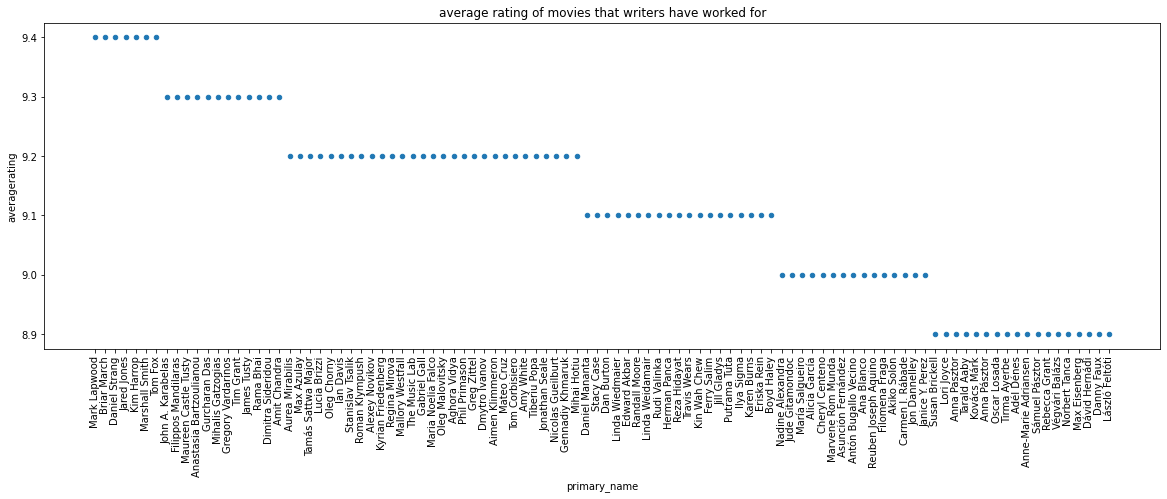

In [24]:
# create a scatter plot showing that there is a correlation between who a movie is known for and worldwide gross
plt.rcParams["figure.figsize"] = (20,6)
top_rated_writers.plot(x = "primary_name", y = "averagerating", kind = "scatter")
plt.xticks(rotation='vertical')
plt.title("average rating of movies that writers have worked for")

<AxesSubplot:xlabel='primary_name'>

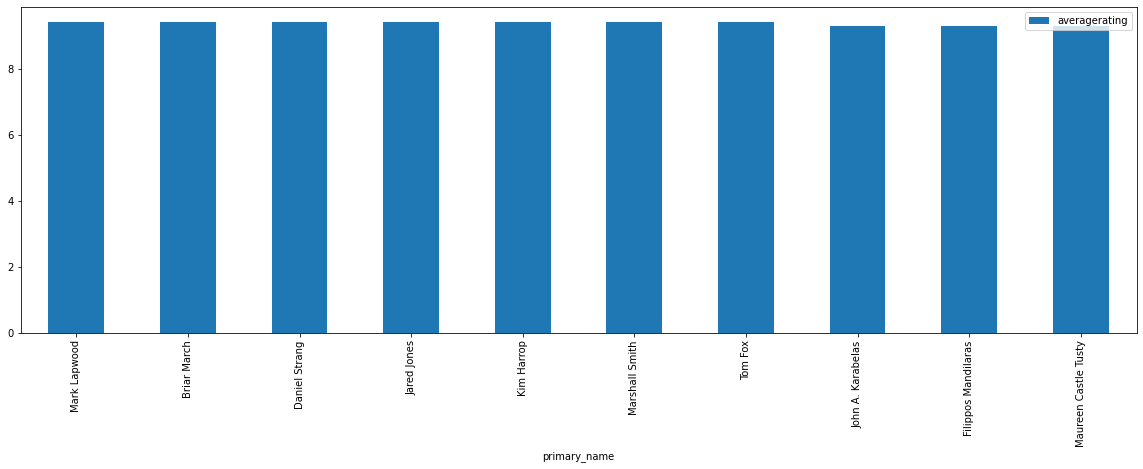

In [25]:
# create a bar graph showing the top 50 actors with the average highest rated movies
top_10_writers = top_rated_writers.head(10)
plt.rcParams["figure.figsize"] = (20,6)
top_10_writers.plot(x = "primary_name", y = "averagerating", kind = "bar")

# Average number of movies for directors

create a sql query that retruns a table with all the directors and the number of movies they have directed

In [26]:
num_of_movies_dir = """
SELECT 
    COUNT(movie_basics.primary_title),
    persons.primary_name
FROM persons
JOIN directors
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN principals
    USING(movie_id)
WHERE job LIKE "lead director" OR job LIKE "assistant director" OR job LIKE "co director" OR job LIKE "co-director"
GROUP BY primary_name
    HAVING COUNT(movie_basics.primary_title)
"""
num_of_movies_dir_df = pd.read_sql(num_of_movies_dir, conn)
num_of_movies_dir_df

,COUNT(movie_basics.primary_title),primary_name
0,2,A. Todd Smith
1,4,A.J. Detisch
2,2,A.M. Greene
3,2,Aaron Andrews
4,1,Aaron Bell
...,...,...
8094,3,Özlem Koza
8095,4,Özlem Sariyildiz
8096,5,Ülkü Oktay
8097,3,Þórdur Bragi Jónsson


find the average number of movies that a director has been in 

In [27]:
avg_movies_dir = num_of_movies_dir_df["COUNT(movie_basics.primary_title)"].mean()
avg_movies_dir

3.4520311149524634

create a box plot to show quartile range of the number of movies directors have been in 

Text(0.5, 1.0, 'Box Plot showing Quartile Range of Number of Movies each Director has Been in')

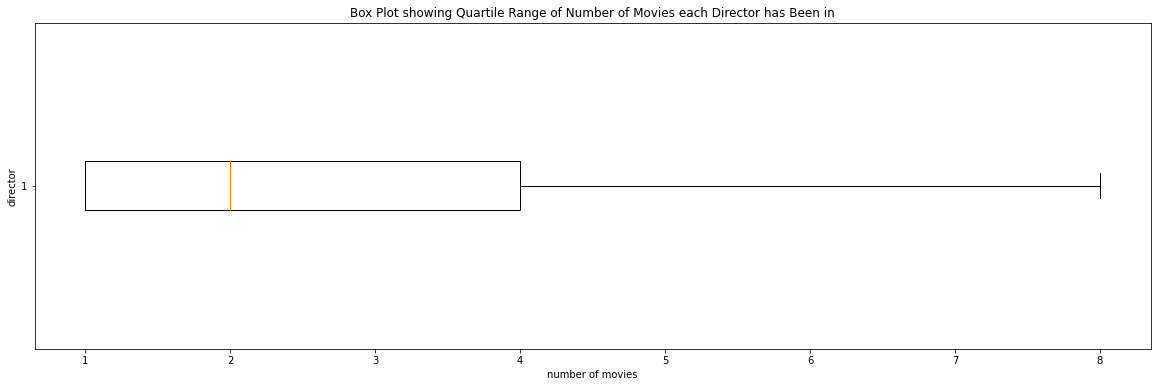

In [28]:
plt.boxplot(num_of_movies_dir_df["COUNT(movie_basics.primary_title)"], vert=False, showfliers=False)
plt.xlabel("number of movies")
plt.ylabel("director")
plt.title("Box Plot showing Quartile Range of Number of Movies each Director has Been in")

conclude that it is okay to have directors that have only directed one movie in dataset because it is within the IQR

# Directors of movies and the movie budget

create a table that shows the directors for all movies in the database

In [29]:
# create a SQL query that returns the primary name of the director and their movie
# then turn the query into a dataframe
# the SQL query should include only people whose job on the movie was "lead director", "assistant director",
# or "co director" and who are still alive today 
directors = """
SELECT 
    persons.primary_name,
    principals.job,
    movie_basics.primary_title
FROM persons
JOIN directors
    USING(person_id)
JOIN movie_ratings
    USING(movie_id)
JOIN movie_basics
    USING(movie_id)
JOIN principals
    USING(movie_id)
WHERE (job LIKE "lead director" OR job LIKE "assistant director" OR job LIKE "co director" OR job LIKE "co-director") 
        AND death_year IS NULL
"""

directors_df = pd.read_sql(directors, conn)

# clean table by dropping duplicates and na values
directors_df = directors_df.drop_duplicates()
directors_df = directors_df.dropna()
directors_df

,primary_name,job,primary_title
0,Toby Genkel,co-director,Thor: Legend of the Magical Hammer
10,Toby Genkel,co-director,All Creatures Big and Small
14,Tod Mesirow,co-director,The Wild Ponies of Chincoteague
15,Nick Read,co-director,Bolshoi Babylon
16,Michael Creighton Rogers,co-director,We Run Sh*t
...,...,...,...
12767,Valerie Girie,co-director,Ramesses II: The Great Journey
12769,Xiao Xiao,co-director,Turtle Rock
12770,Samuel Rich,co-director,Lost Kites
12771,Khian Bartlett,lead director,The Invisible Man


In [30]:
# examine the budget table
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,335507625,2.351345e+09
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09,459363944,2.008208e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09,630662225,1.747311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,378815482,1.748134e+09
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09,437270625,1.433855e+09


merge the budget and director tables, then create a table that shows the directors and the budget of their movies

In [31]:
profit_and_directors = pd.merge(budget, directors_df, left_on='movie', right_on="primary_title")
profit_and_directors.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,profit,primary_name,job,primary_title
0,30,"Jun 30, 2017",Despicable Me 3,75000000,264624300,1.034728e+09,189624300,959727750.0,Kyle Balda,co-director,Despicable Me 3
1,30,"Jun 30, 2017",Despicable Me 3,75000000,264624300,1.034728e+09,189624300,959727750.0,Pierre Coffin,co-director,Despicable Me 3
2,30,"Jun 30, 2017",Despicable Me 3,75000000,264624300,1.034728e+09,189624300,959727750.0,Eric Guillon,co-director,Despicable Me 3
3,46,"Jun 17, 2016",Finding Dory,200000000,486295561,1.021215e+09,286295561,821215193.0,Angus MacLane,co-director,Finding Dory
4,46,"Jun 17, 2016",Finding Dory,200000000,486295561,1.021215e+09,286295561,821215193.0,Andrew Stanton,co-director,Finding Dory


In [32]:
# create a table with only directors and the worldwide gross of their movies
wwg_directors = profit_and_directors.loc[:,["primary_name", "worldwide_gross"]]
wwg_directors.head()

,primary_name,worldwide_gross
0,Kyle Balda,1.034728e+09
1,Pierre Coffin,1.034728e+09
2,Eric Guillon,1.034728e+09
3,Angus MacLane,1.021215e+09
4,Andrew Stanton,1.021215e+09


In [33]:
# remove any rows with values == 0
empty_index = wwg_directors[wwg_directors["worldwide_gross"] == 0].index
wwg_directors = wwg_directors.drop(empty_index)

In [34]:
# sort the list by descending
wwg_directors = wwg_directors.sort_values(by = "worldwide_gross", ascending=False)
pd.set_option('display.float_format', lambda x: '%.9f' % x)
pd.options.display.float_format = '{:,.1f}'.format
wwg_directors

,primary_name,worldwide_gross
0,Kyle Balda,"1,034,727,750.0"
2,Eric Guillon,"1,034,727,750.0"
1,Pierre Coffin,"1,034,727,750.0"
3,Angus MacLane,"1,021,215,193.0"
4,Andrew Stanton,"1,021,215,193.0"
...,...,...
79,Taedong Park,"360,898.0"
80,Steven Greenstreet,"100,280.0"
81,Reed Cowan,"100,280.0"
82,Kate Connor,"78,948.0"


create a boxplot that shows the range of worldwide gross

AttributeError: This method only works with the ScalarFormatter

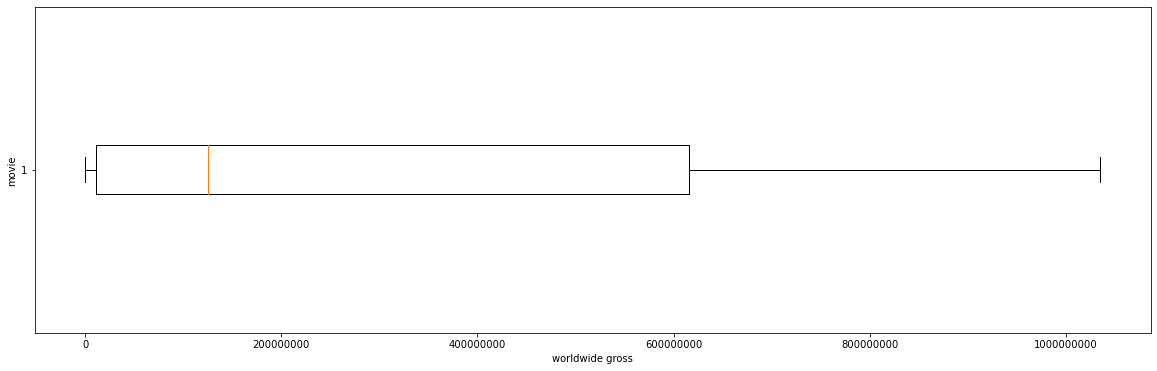

In [35]:
plt.boxplot(wwg_directors["worldwide_gross"], vert=False)
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel("worldwide gross")
plt.ylabel("movie")
plt.ticklabel_format(style="plain")

create a scatter plot that show the directors above the 75 quartile and the worldwide gross of each of their movies 

Text(0.5, 1.0, 'directors and the average worldwide gross of the movies they have directed')

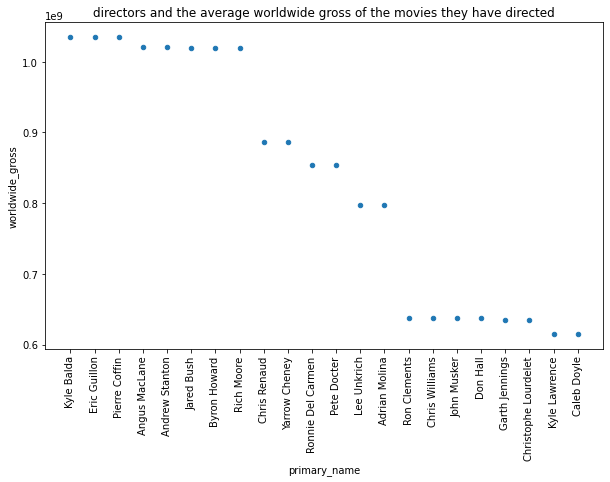

In [36]:
# create a scatter plot showing that there is a correlation between director and worldwide gross
directors_above_75Q = wwg_directors[wwg_directors["worldwide_gross"] >= 600000000]
plt.rcParams["figure.figsize"] = (10,6)
directors_above_75Q.plot(x = "primary_name", y = "worldwide_gross", kind = "scatter")
plt.xticks(rotation='vertical')
plt.title("directors and the average worldwide gross of the movies they have directed")

create a bar graph that shows the top directors above the 75 quartile with the highest grossing movies 

Text(0.5, 1.0, 'Directors with Worldwide Gross Above the 75th Quartile')

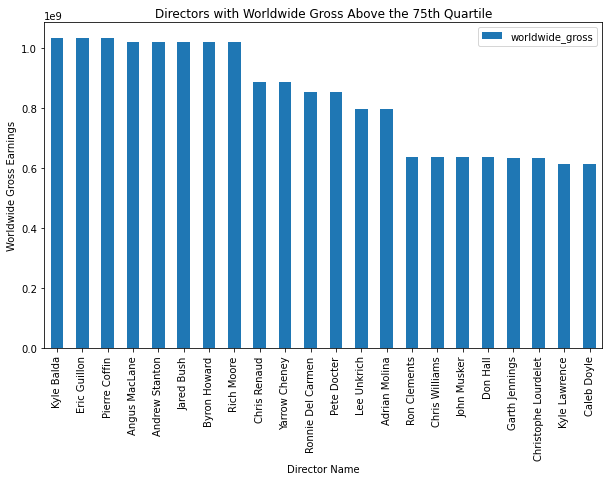

In [37]:
plt.rcParams["figure.figsize"] = (10,6)
directors_above_75Q.plot(x = "primary_name", y = "worldwide_gross", kind = "bar")
plt.ylabel("Worldwide Gross Earnings")
plt.xlabel("Director Name")
plt.xticks(rotation='vertical')
plt.title("Directors with Worldwide Gross Above the 75th Quartile")

plot a bar graph that has the top 5 best directors:

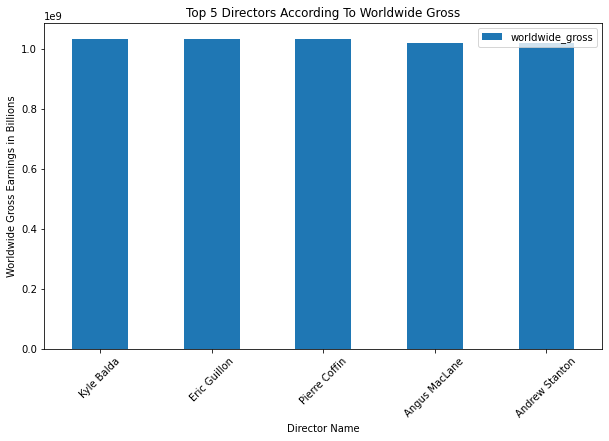

In [38]:
top_5_dir = wwg_directors.head(5)
plt.rcParams["figure.figsize"] = (10,6)
top_5_dir.plot(x = "primary_name", y = "worldwide_gross", kind = "bar")
plt.ylabel("Worldwide Gross Earnings in Billions")
plt.xlabel("Director Name")
plt.xticks(rotation=45)
plt.title("Top 5 Directors According To Worldwide Gross")
plt.savefig("top5dir")

# Directors of movies and the movies ratings

In [39]:
directors_and_ratings = """
SELECT 
    persons.primary_name,
    movie_ratings.averagerating
FROM persons
JOIN directors 
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id)
JOIN principals
    USING(movie_id)
WHERE job LIKE "lead director" OR job LIKE "assistant director" OR job LIKE "co director" OR job LIKE "co-director"
GROUP BY primary_name
"""

directors_and_ratings_df = pd.read_sql(directors_and_ratings, conn)

# clean the data from the new table 
directors_and_ratings_df = directors_and_ratings_df.drop_duplicates()
directors_and_ratings_df = directors_and_ratings_df.dropna()

directors_and_ratings_df

,primary_name,averagerating
0,A. Todd Smith,8.2
1,A.J. Detisch,6.9
2,A.M. Greene,7.2
3,Aaron Bishop,5.1
4,Aaron Cadieux,5.4
...,...,...
3523,Özgür Bakar,3.6
3524,Özlem Koza,6.6
3525,Özlem Sariyildiz,7.8
3526,Ülkü Oktay,6.0


In [40]:
# choosing not to remove rows with average rating of 0 incase that is the actual average rating
# view the attributes and ratings table in decsending order
directors_and_ratings_df = directors_and_ratings_df.sort_values("averagerating", ascending=False)
directors_and_ratings_df

,primary_name,averagerating
519,Casey Kauffman,9.6
106,Alessandro Cassigoli,9.6
1669,Josepmaria Anglès,9.5
390,Bharatha Hettiarachchi,9.5
1909,Lauren Ross,9.5
...,...,...
943,Ely Buendia,1.6
2072,Marc Roussel,1.5
378,Bernard-Henri Lévy,1.5
3216,Takeo Urakami,1.0


create a box plot that shows the IQR of the averageratings of directors

Text(0.5, 1.0, 'Range of Average Ratings for Directors')

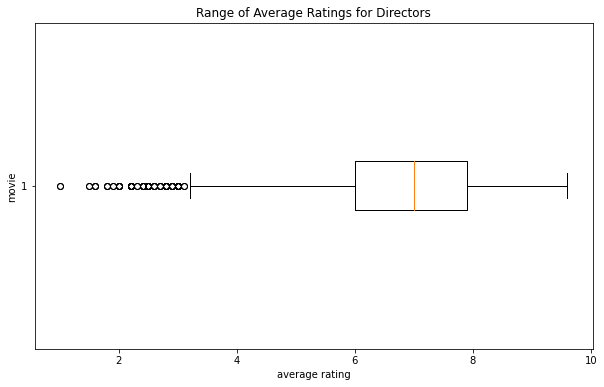

In [41]:
plt.boxplot(directors_and_ratings_df["averagerating"], vert=False)
plt.rcParams["figure.figsize"] = (5,3)
plt.xlabel("average rating")
plt.ylabel("movie")
plt.title("Range of Average Ratings for Directors")

create a scatter plot showing all directors with above average rating

In [ ]:
above_avg_rated_dir = directors_and_ratings_df[directors_and_ratings_df["averagerating"] >= 8]
plt.rcParams["figure.figsize"] = (20,6)
above_avg_rated_dir.plot(x = "primary_name", y = "averagerating", kind = "scatter")
plt.xticks(rotation='vertical')
plt.title("directors and the average rating of their movies")

Text(0.5, 1.0, 'directors and the average rating of their movies')

still too many directors to choose from, we will create another box plot that graphs the 

In [ ]:
plt.boxplot(above_avg_rated_dir["averagerating"], vert=False)
plt.rcParams["figure.figsize"] = (5,1)
plt.xlabel("average rating")
plt.ylabel("movie")
plt.title("Range of Average Ratings for Directors")

create a bar graph that shows all the directors that are above the maximum

In [ ]:
# create a bar graph showing the top 50 directors with the highest grossing movies
very_best_directors = above_avg_rated_dir[above_avg_rated_dir["averagerating"] >= 9.4]
plt.rcParams["figure.figsize"] = (10,6)
very_best_directors.plot(x = "primary_name", y = "averagerating", kind = "bar")
plt.title("Average Movie Rating for Directors")
plt.ylabel("Average Movie Ratings")
plt.xlabel("Director Name")
#plt.xticks(rotation='horizontal')
#plt.yticks()